In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


## 1) importing libraries

In [2]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
# import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
# from geopy.distance import great_circle # distance btn 2 (lat,long)
# from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling

## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

In [ ]:
## show all the columns of the data
pd.set_option('display.max_columns', None)

In [4]:
data_path = '/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv'
df = pd.read_csv(data_path)

/tmp/ipykernel_31/614870294.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


### 1) Understanding Data



* a) Understand Columns

* b) check dtype -> df[col].astype()

* c) Describe Numerical Cols

* d) Describe Categorical Cols

In [5]:
df.info()

## last_review => datetime
## license, id, host_id, host_name => drop
## if country & country code is 1 value => drop
## price, service fee => int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.select_dtypes(include='number').describe()

## check min&max for nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

In [7]:
df.drop(['license', 'id', 'host id', 'host name', 'NAME', 'house_rules'], axis=1, errors='ignore', inplace=True)

In [8]:
df['last review'] = pd.to_datetime(df['last review'])

In [9]:
df.drop(columns=['country', 'country code'], inplace=True)

In [10]:
df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''))
df['service fee'] = pd.to_numeric(df['service fee'].str.replace('$', '').str.replace(',', ''))

In [11]:
df.duplicated().sum() # check duplicated rows

3636

In [12]:
df.drop_duplicates(inplace=True) # drop duplicated rows
df.reset_index(drop=True, inplace=True) # reset index

In [13]:
df.isnull().sum() # check null values

host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      398
number of reviews                   180
last review                       15352
reviews per month                 15338
review rate number                  313
calculated host listings count      308
availability 365                    448
dtype: int64

In [ ]:
## decided to remove any value over 30, as it's usual for the application to rent by day and maximum a month
min_max_nights = df[(df['minimum nights'] < 1) | (df['minimum nights'] > 30)]
df.drop(min_max_nights.index, inplace=True) 
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [15]:
df.describe(include='number')

lat          long  Construction year         price  \
count  97303.000000  97303.000000       97100.000000  97074.000000   
mean      40.728015    -73.949439        2012.490021    625.354905   
std        0.055881      0.049696           5.766792    331.757910   
min       40.499790    -74.249840        2003.000000     50.000000   
25%       40.688660    -73.982520        2007.000000    339.000000   
50%       40.722220    -73.954400        2012.000000    624.000000   
75%       40.762685    -73.932070        2017.000000    913.000000   
max       40.916970    -73.705220        2022.000000   1200.000000   

        service fee  minimum nights  number of reviews  reviews per month  \
count  97047.000000    96913.000000       97131.000000       82451.000000   
mean     125.037693        6.563175          27.774521           1.387313   
std       66.342329        9.379090          50.006641           1.759596   
min       10.000000        1.000000           0.000000           0.010000   
25%       68.000000        1.000000           1.000000           0.220000   
50%      125.000000        3.000000           7.000000           0.760000   
75%      183.000000        5.000000          31.000000           2.020000   
max      240.000000       30.000000        1024.000000          90.000000   

       review rate number  calculated host listings count  availability 365  
count        97004.000000                    97003.000000      96869.000000  
mean             3.282772                        7.972826        141.314631  
std              1.282823                       32.366270        135.428705  
min              1.000000                        1.000000        -10.000000  
25%              2.000000                        1.000000          3.000000  
50%              3.000000                        1.000000         97.000000  
75%              4.000000                        2.000000        269.000000  
max              5.000000                      332.000000       3677.000000

In [16]:
review_count = df[df['number of reviews'] > 400]
df.drop(review_count.index, inplace=True)
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [17]:
review_per_month = df[df['reviews per month'] > 10]
df.drop(review_per_month.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
## the availability is over the year, so it cannot be more than 365 or less than zero
availability = df[(df['availability 365'] > 365) | (df['availability 365'] < 0)]
df.drop(availability.index, inplace=True)
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [19]:
# * d) Describe Categorical Cols

cat_cols = df.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'host_identity_verified' is: 2
uniques of 'host_identity_verified' is:
['unconfirmed' 'verified' nan]

**************************************************

number of uniques of 'neighbourhood group' is: 7
uniques of 'neighbourhood group' is:
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Bronx'
 'Staten Island']

**************************************************

number of uniques of 'neighbourhood' is: 224
uniques of 'neighbourhood' is:
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem' 'Chinatown'
 'Upper West Side' "Hell's Kitchen" 'South Slope' 'Williamsburg'
 'Fort Greene' 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace'
 'Inwood' 'East Village' 'Bedford-Stuyvesant' 'Bushwick' 'Flatbush'
 'Lower East Side' 'Prospect-Lefferts Gardens' 'Long Island City'
 'Greenpoint' 'Kips Bay' 'SoHo' 'Upper East Side' 'Prospect Heights'
 'Washington Heights' 'Woodside' 'Brooklyn Heights' 'Carroll Gardens'
 'West Village' 'Flatlands' 'Cobble Hill'

In [20]:
for col in cat_cols:
    print(f"count of each unique in column \'{col}\' is:\n{df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

count of each unique in column 'host_identity_verified' is:
host_identity_verified
unconfirmed    46888
verified       46799
Name: count, dtype: int64

**************************************************

count of each unique in column 'neighbourhood group' is:
neighbourhood group
Manhattan        39803
Brooklyn         38400
Queens           12295
Bronx             2539
Staten Island      883
brookln              1
manhatan             1
Name: count, dtype: int64

**************************************************

count of each unique in column 'neighbourhood' is:
neighbourhood
Bedford-Stuyvesant        7339
Williamsburg              7092
Harlem                    4964
Bushwick                  4597
Hell's Kitchen            3663
                          ... 
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Rossville                    1
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

*********************************

In [21]:
df.columns = [col.lower().replace(" ","_") for col in df.columns]

In [22]:
df.replace(('brookln','manhatan'),('Brooklyn','Manhattan'), inplace=True)

In [23]:
least_common_neighbourhoods = df['neighbourhood'].value_counts().sort_values(ascending=True).head(125).index
df['neighbourhood'] = df['neighbourhood'].replace(least_common_neighbourhoods, 'Other')

## 2) Extract Features

In [ ]:
## check if the host has more than one unit
df['is_multi_listing_host'] = df['calculated_host_listings_count'].apply(lambda x: 1 if x > 1 else 0)

In [25]:
df.drop(columns=['calculated_host_listings_count'], inplace=True)

In [26]:
# Manhattan center coordinates (approximate - Times Square)
manhattan_center_lat = 40.7580
manhattan_center_long = -73.9855

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

df['distance_to_center_km'] = haversine_distance(
    df['lat'], df['long'],
    manhattan_center_lat, manhattan_center_long
)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
from datetime import datetime

current_year = datetime.now().year
df['property_age'] = current_year - df['construction_year']

## 3) EDA

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


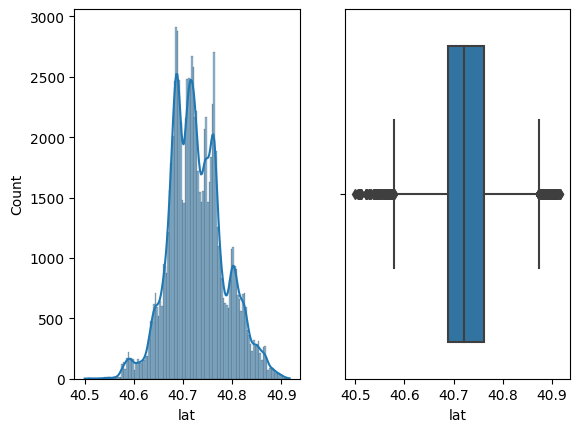

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


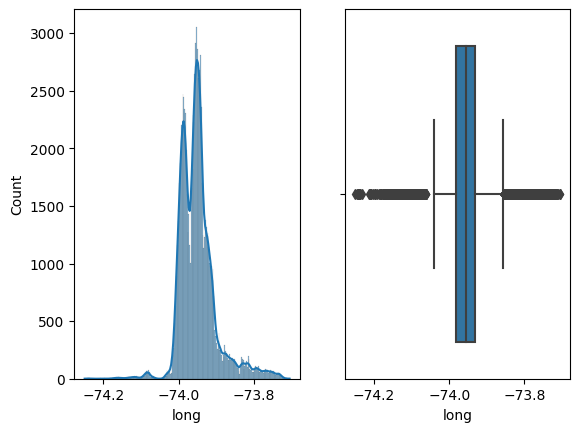

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


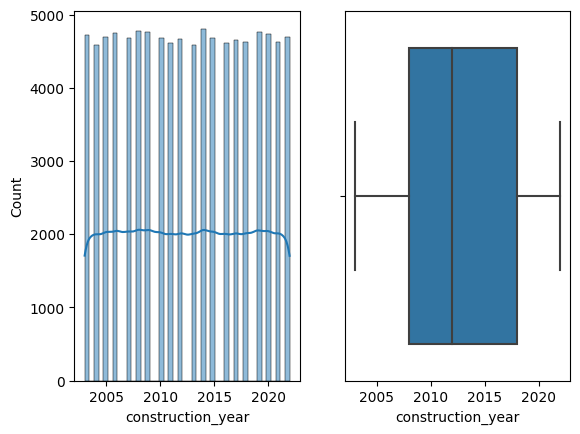

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


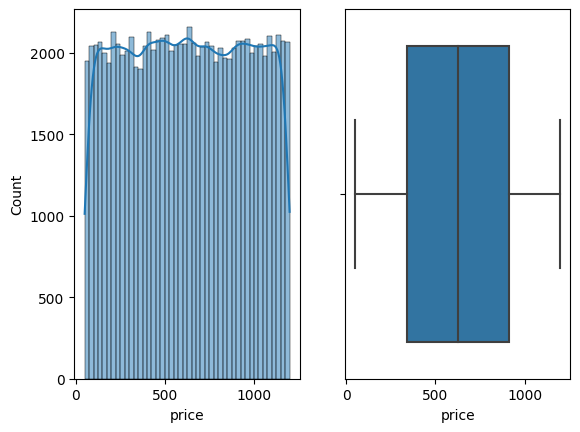

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


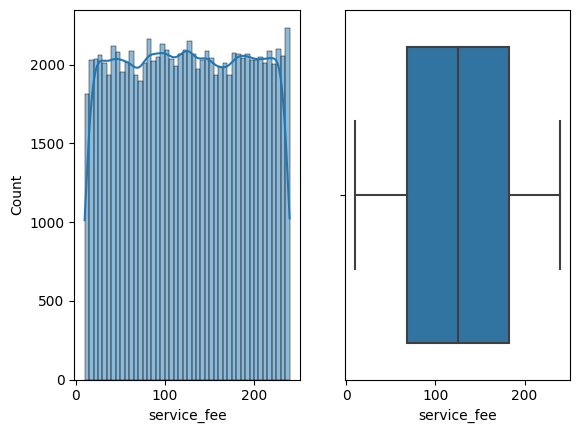

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


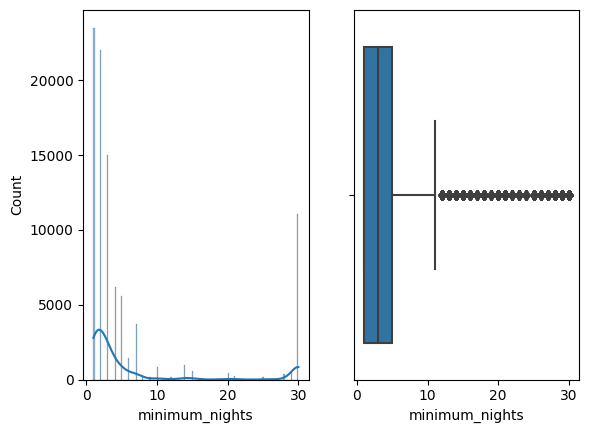

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


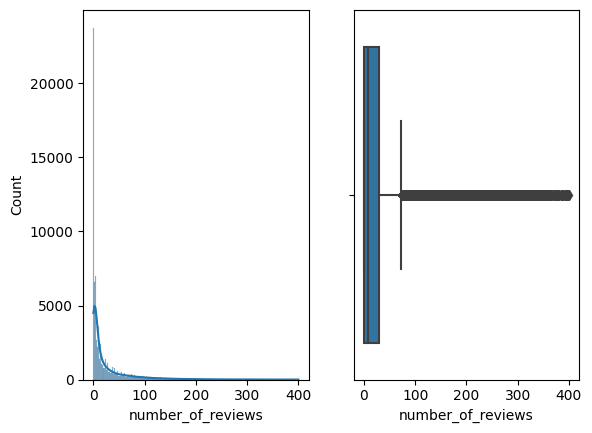

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


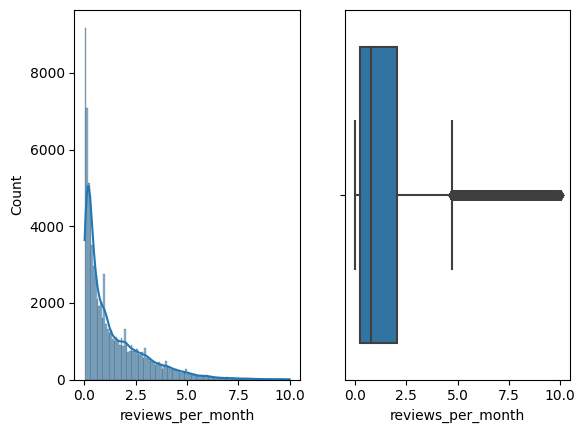

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


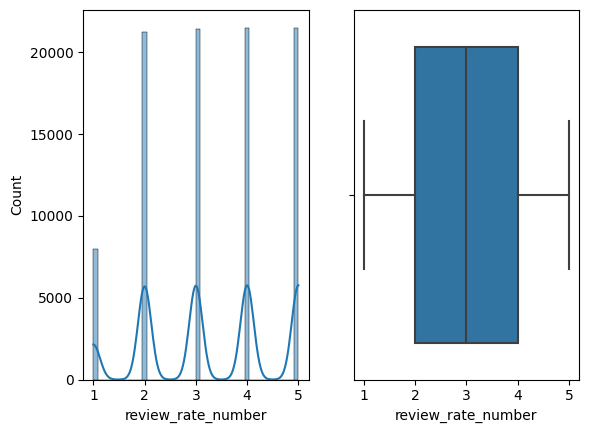

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


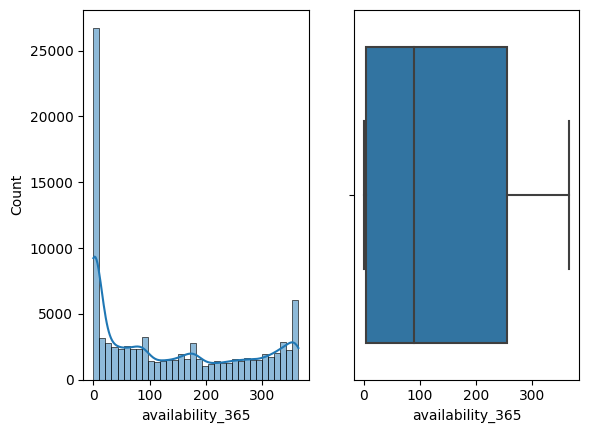

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


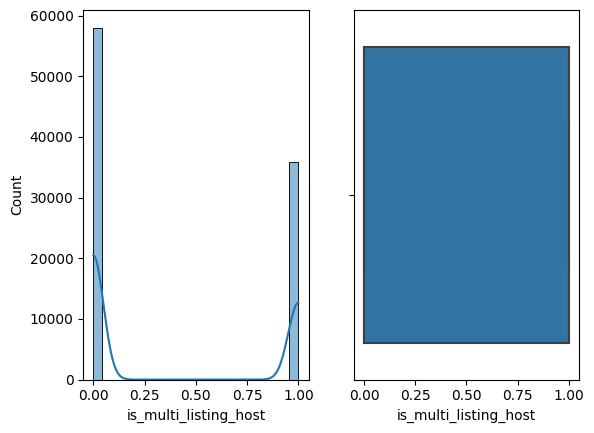

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


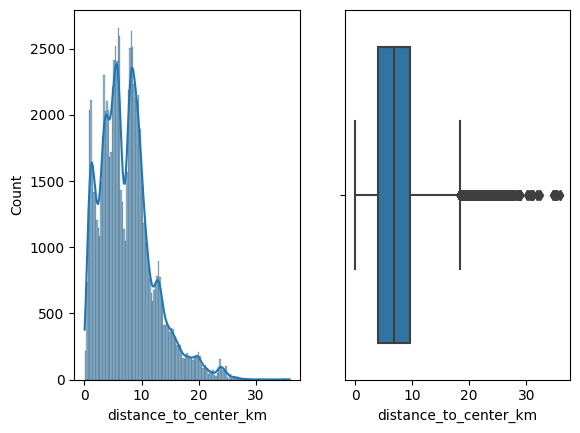

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


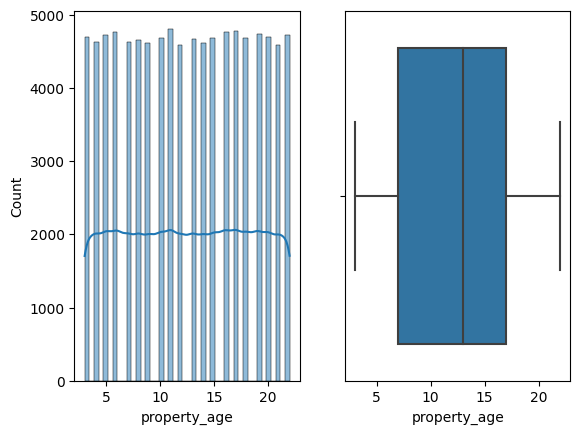

In [28]:
# UniVariate Analysis

num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(x=df[col], ax=axes[1])
    plt.show()



## min nights, no of reviews, reviews per month, distance to center -- right skewed (log)

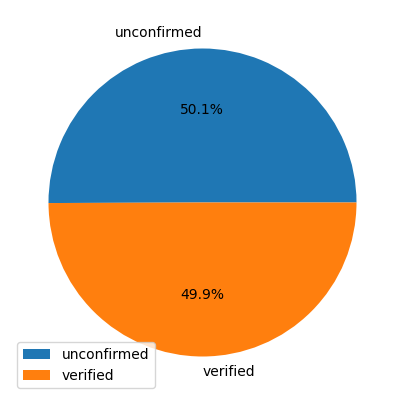

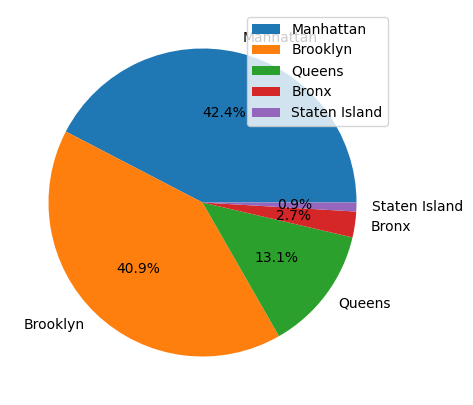

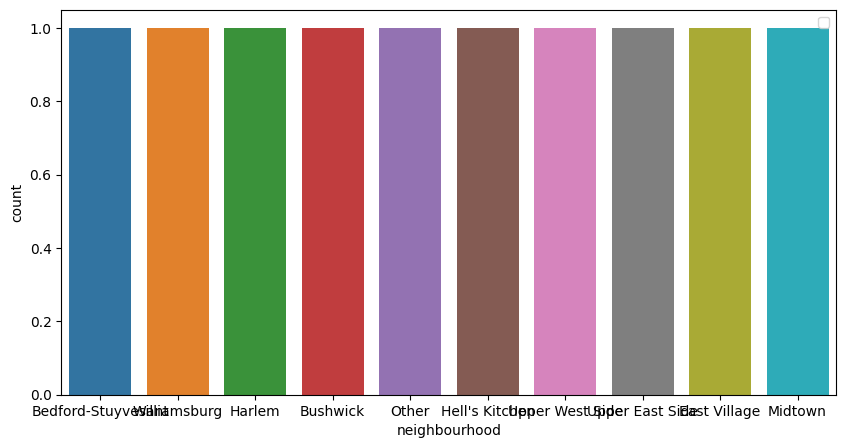

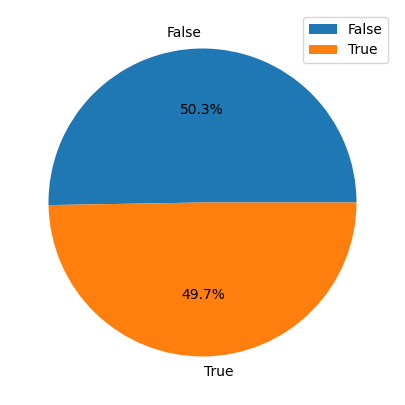

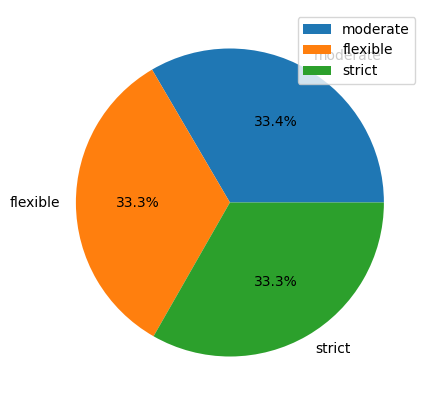

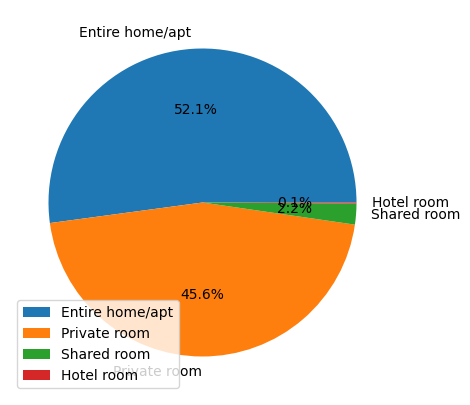

In [29]:
cat_cols = df.select_dtypes(include='O').columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    
    if df[col].nunique() < 10:
        dff = df.groupby(col)[['price']].count().reset_index().sort_values(by='price', ascending=False)
        plt.pie(labels=dff[col], x=dff['price'], autopct="%1.1f%%")
        
    elif df[col].nunique() < 50:
        sns.countplot(x=df[col])

    else: 
        dff = df.groupby(col)[['price']].count().reset_index().sort_values(by='price', ascending=False).head(10)
        sns.countplot(x=dff[col])
    
    plt.legend()
    plt.show()

<Axes: >

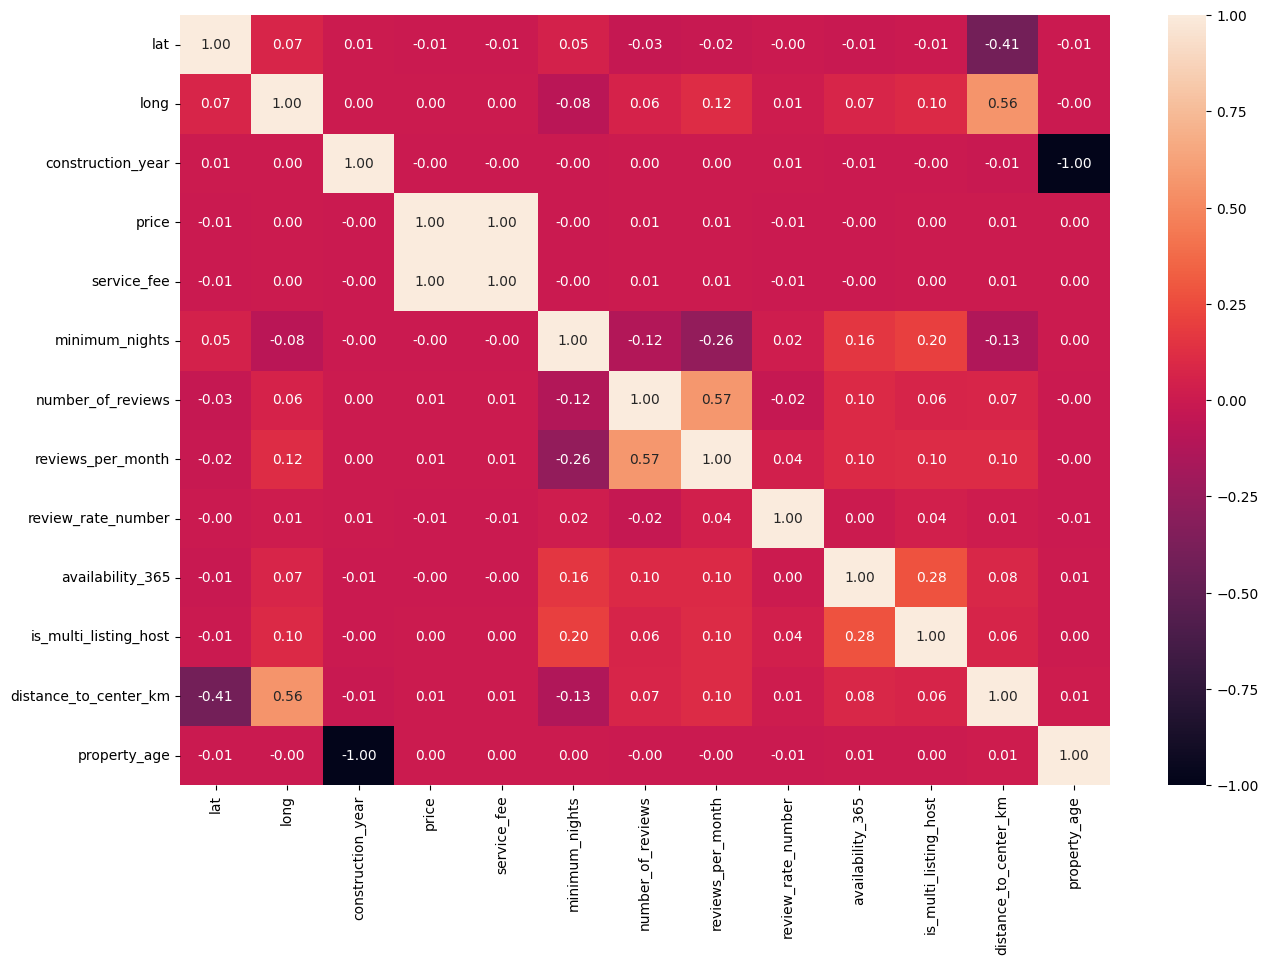

In [ ]:
# Bi-Variate
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f')

# Observations from the heatmap:
# - 'price' and 'service_fee' show very strong positive correlations (close to 1.0), Consider dropping for modeling.
# - 'construction_year' and 'property_age' are perfectly negatively correlated (-1.0), which is expected, as older properties have lower construction years.
# - 'number_of_reviews' and 'reviews_per_month' are also strongly correlated (0.8), indicating that properties with more reviews tend to have higher review rates.
# - Most other features have weak or no correlation with 'price', such as 'availability_365' or 'distance_to_center_km', which may have less predictive accuracy.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

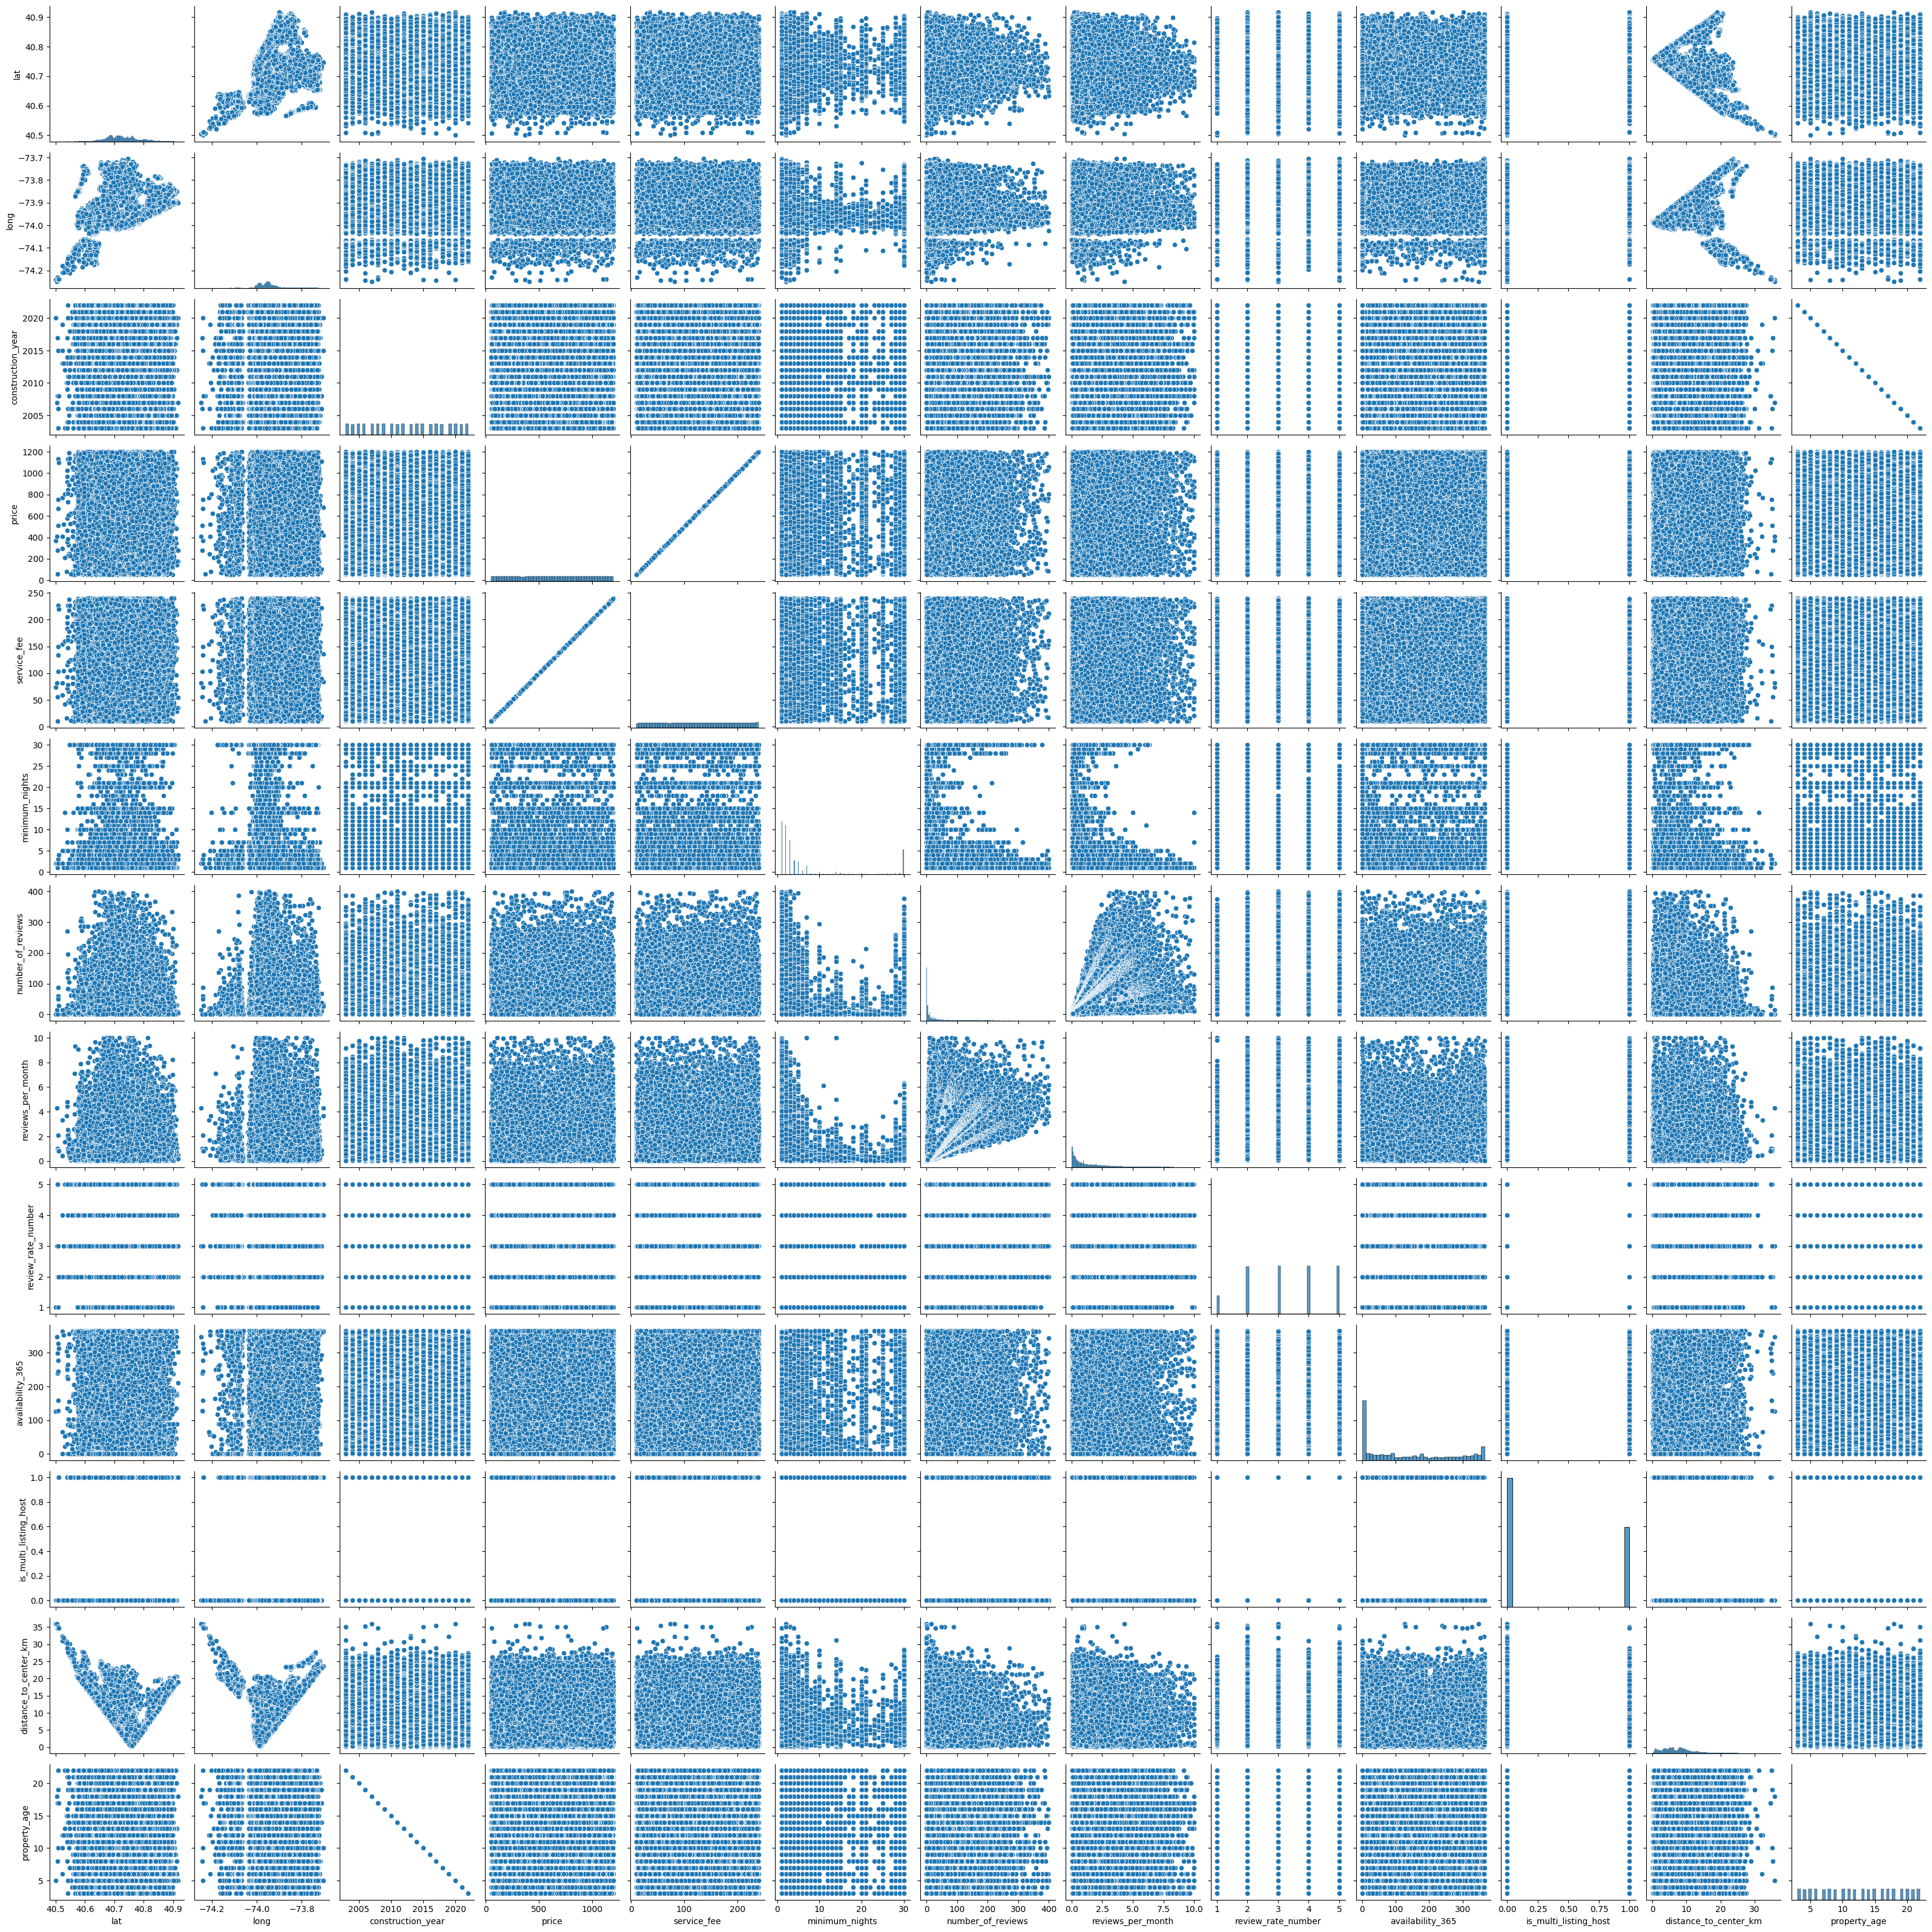

In [31]:
# MultiVariate
sns.pairplot(df.select_dtypes(include='number'))

In [32]:
corr = df.select_dtypes(include='number').corr()['price'].sort_values(ascending=False)
print(corr)

price                    1.000000
service_fee              0.999991
reviews_per_month        0.006013
number_of_reviews        0.005884
distance_to_center_km    0.005356
property_age             0.004714
is_multi_listing_host    0.003087
long                     0.000790
availability_365        -0.000863
minimum_nights          -0.001587
construction_year       -0.004714
review_rate_number      -0.005706
lat                     -0.006704
Name: price, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

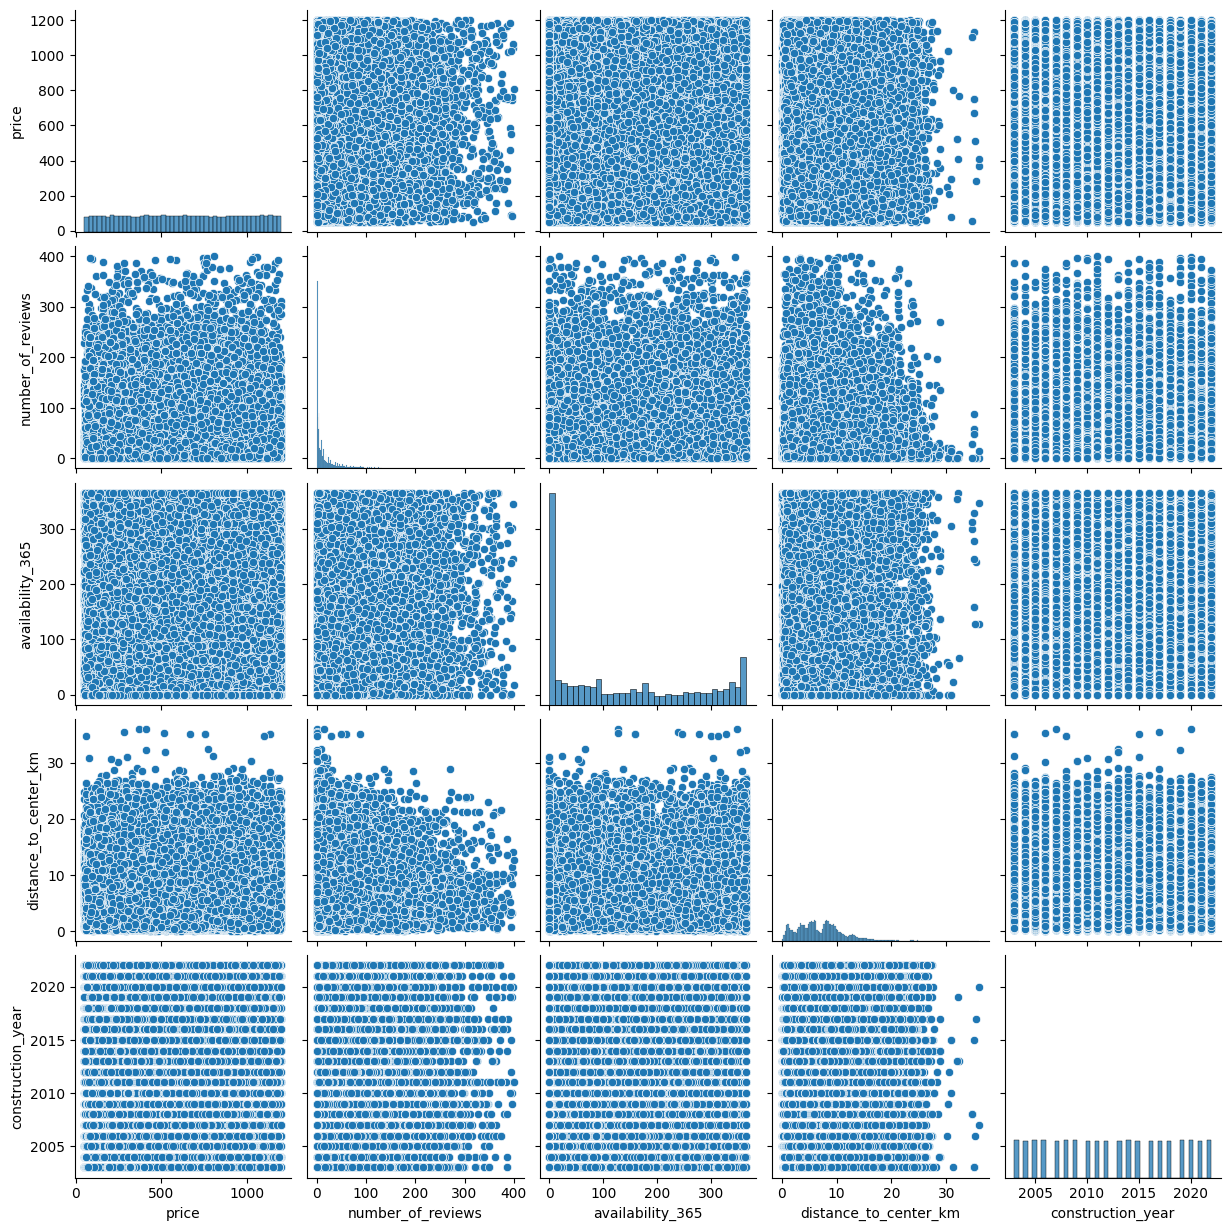

In [ ]:
top_features = ['price', 'number_of_reviews', 'availability_365', 'distance_to_center_km', 'construction_year']
sns.pairplot(df[top_features])
plt.show()


## Insights 
# 1- price vs number_of_reviews: no visible trend so reviews are not strongly correlated with price.
# 2- price vs availability_365: No clear pattern, high variance.
# 3- price vs distance_to_center_km: a slight downward trend so properties further from the center might be slightly cheaper.
# 4- price vs construction_year: No visible trend; price is spread across years.


## 4) Questions

neighbourhood
Gravesend         705.976744
Briarwood         689.044643
Concourse         682.859649
NoHo              678.653846
Queens Village    666.755396
Longwood          663.610169
Glendale          663.333333
East Elmhurst     662.121359
Brighton Beach    660.242038
Inwood            658.872299
Name: price, dtype: float64


<Axes: xlabel='neighbourhood'>

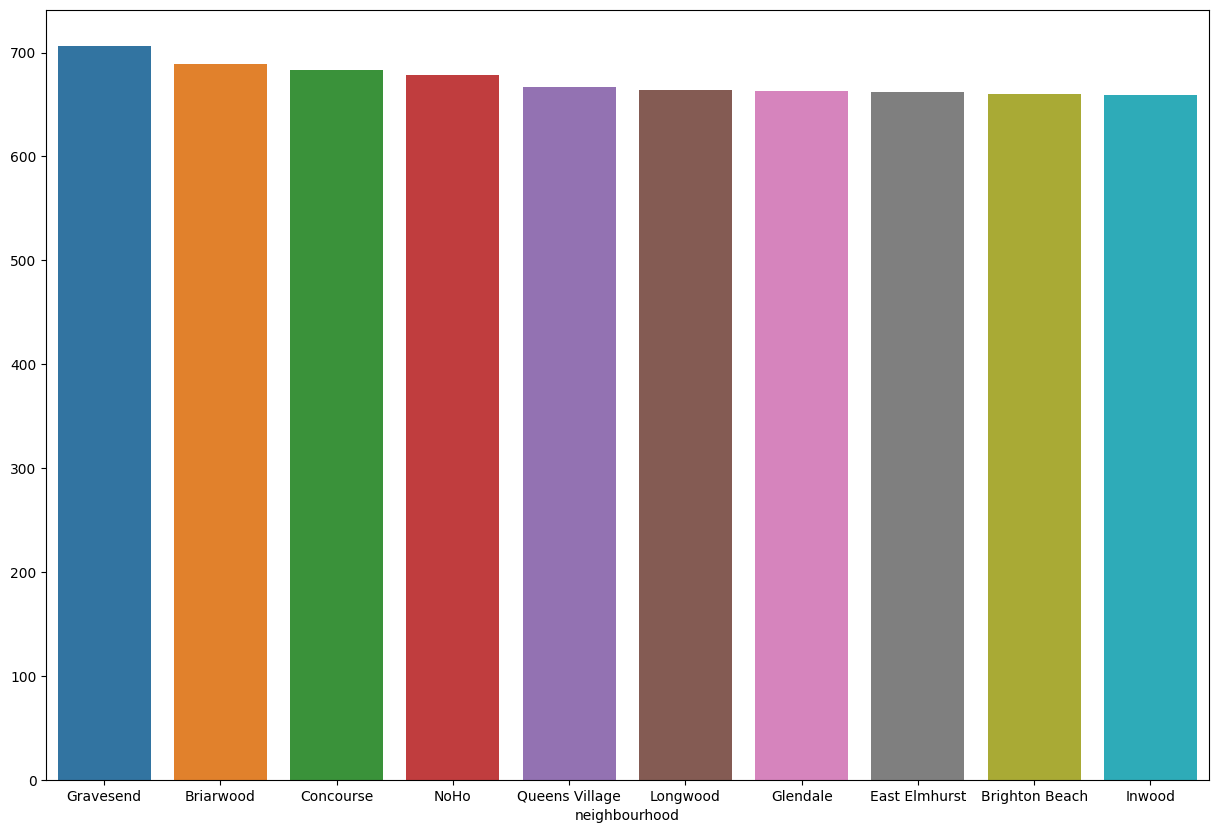

In [34]:
# 1. Which neighbourhoods have the highest average prices?
top_neighbourhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
print(top_neighbourhoods)
plt.figure(figsize=(15, 10))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values)

Text(0.5, 1.0, 'Price Distribution by Room Type')

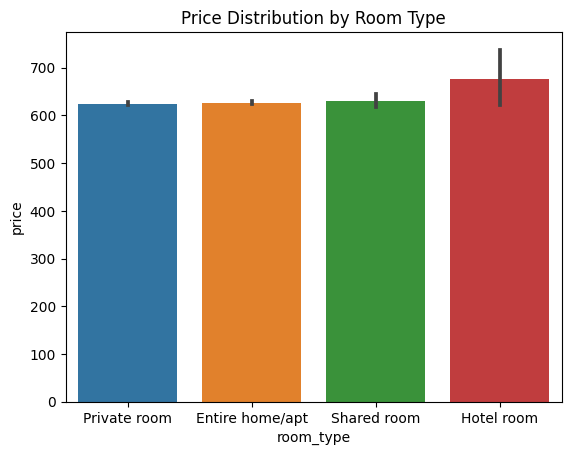

In [ ]:
#2. How does room type affect price?
sns.barplot(x='room_type', y='price', data=df)
plt.title("Price Distribution by Room Type")

## Hotels are a bit more expensive than the other types

Text(0, 0.5, 'Average Price')

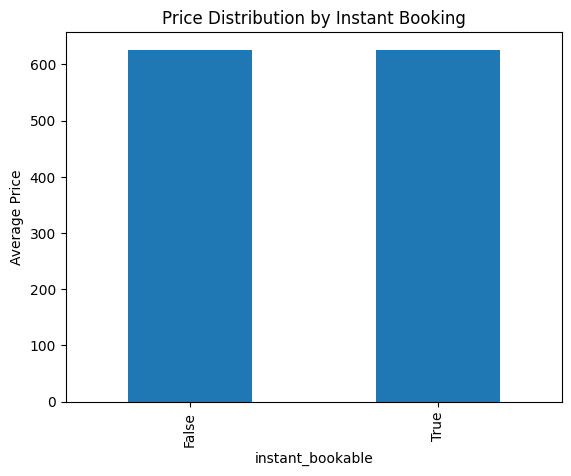

In [ ]:
#3. Is instant booking associated with higher prices?
df.groupby('instant_bookable')['price'].mean().plot(kind='bar')
plt.title("Price Distribution by Instant Booking")
plt.ylabel("Average Price")


## the instant booking doesn't affect the price

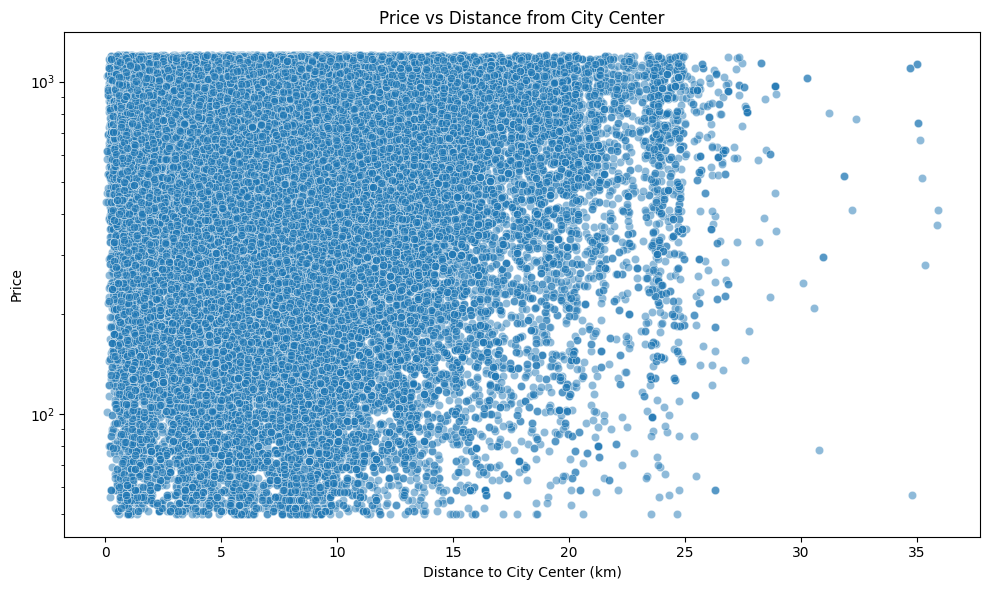

In [ ]:
#4. How does price vary with location?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_center_km', y='price', alpha=0.5)
plt.title("Price vs Distance from City Center")
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Price")
plt.yscale("log")
plt.tight_layout()
plt.show()

## 1- the price range is very wide
## 2- the location does affect the price as it decreases when I'm away from centre
## 3- it's obvious from the wide variety that linear model wouldn't be accurate or good

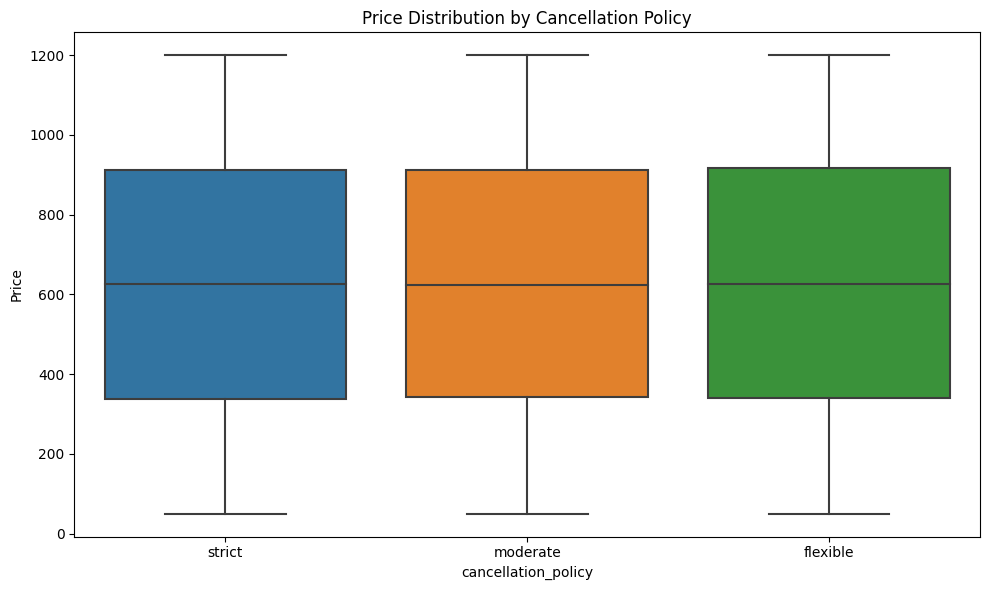

In [ ]:
#5. How does cancellation policy impact pricing?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cancellation_policy', y='price')
plt.title("Price Distribution by Cancellation Policy")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

## cancellation policy doesn't really affect the price

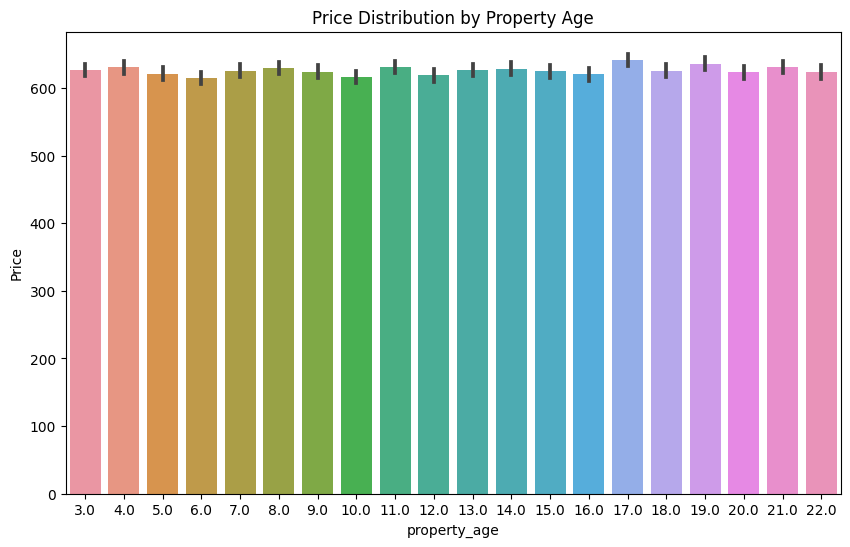

In [ ]:
#6. Are newly built properties priced higher?
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='property_age', y='price')
plt.title("Price Distribution by Property Age")
plt.ylabel("Price")
plt.show()


## 1- Prices Are similar Across Property Ages
## 2- Property age doesn't really affect price.

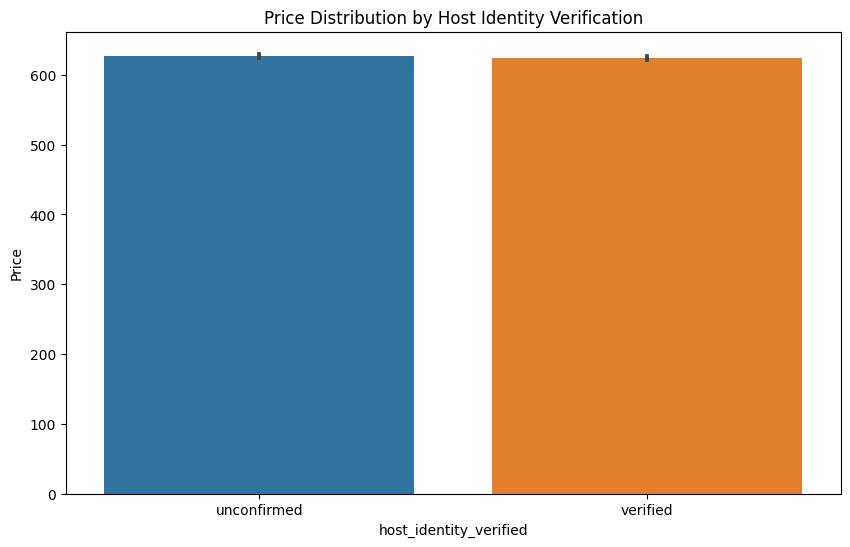

host_identity_verified
unconfirmed    627.334074
verified       624.253128
Name: price, dtype: float64

In [ ]:
#7 Does the host's identity verification affect pricing?
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='host_identity_verified', y='price')
plt.title("Price Distribution by Host Identity Verification")
plt.ylabel("Price")
plt.show()

df.groupby('host_identity_verified')['price'].mean()
## host identity Doesn't affect the price

### 3) Pre-Processing Mind Map:

* a) train_test_split

* b) Detect & Handle NaNs

* c) Detect & Handle Outliers

* d) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

* e) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [ ]:
df.drop(columns=['service_fee'], inplace=True)
## the relation between service fee and the price is way too high almost 1, so I dropped it to not cause data leakage

In [ ]:
df = df[df["price"].notna()]
## Drop all The NULLS in price

In [43]:
df['price'].isnull().sum()

0

In [44]:
df.duplicated().sum() # check duplicated rows
df.drop_duplicates(inplace=True) # drop duplicated rows
df.reset_index(drop=True, inplace=True) # reset index

In [45]:
# train_test_split
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((74969, 18), (18743, 18), (74969,), (18743,))

In [46]:
X_train.isnull().sum()

host_identity_verified      210
neighbourhood_group          23
neighbourhood                 6
lat                           7
long                          7
instant_bookable             65
cancellation_policy          43
room_type                     0
construction_year           148
minimum_nights              297
number_of_reviews           139
last_review               11419
reviews_per_month         11410
review_rate_number          231
availability_365            354
is_multi_listing_host         0
distance_to_center_km         7
property_age                148
dtype: int64

In [47]:
X_test.isnull().sum()

host_identity_verified      48
neighbourhood_group          3
neighbourhood                6
lat                          1
long                         1
instant_bookable            18
cancellation_policy         16
room_type                    0
construction_year           37
minimum_nights              75
number_of_reviews           40
last_review               2867
reviews_per_month         2863
review_rate_number          56
availability_365            84
is_multi_listing_host        0
distance_to_center_km        1
property_age                37
dtype: int64

In [48]:
from sklearn.base import TransformerMixin, BaseEstimator


class LogTransformer(BaseEstimator, TransformerMixin):

    # fit
    def fit(self, X, y=None):
        # self.feature_names = list(X.columns)
        self.n_features_in = X.shape[1]
        return self

    # transformer
    def transform(self, X, y=None):
        assert self.n_features_in == X.shape[1]
        return np.log1p(X)

    # def get_feature_names_out(self, X, y=None):
    #     return self.feature_names



log_transformer = LogTransformer()
log_transformer

LogTransformer()

In [49]:
## pipeline
num_cols = X_train.select_dtypes(include='number').columns
print(num_cols)
cat_cols = X_train.select_dtypes(include='object').columns
print(cat_cols)

Index(['lat', 'long', 'construction_year', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_rate_number',
       'availability_365', 'is_multi_listing_host', 'distance_to_center_km',
       'property_age'],
      dtype='object')
Index(['host_identity_verified', 'neighbourhood_group', 'neighbourhood',
       'instant_bookable', 'cancellation_policy', 'room_type'],
      dtype='object')


In [50]:
## pipeline

long_lat_constructionyear_reviewratenumber_propertyage = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('scale', StandardScaler())
])

minimumnights_numberofreviews_reviewspermonth_distancetocenterkm_availability365 = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('log_transform', LogTransformer()),
    ('scale', RobustScaler())
])

hostidentityverified_neighbourhoodgroup_instantbookable_cancellationpolicy_roomtype = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

neighbourhood = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(handle_unknown='ignore')),
    ('scale', StandardScaler())
])

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('long_lat_constructionyear_reviewratenumber_propertyage', long_lat_constructionyear_reviewratenumber_propertyage, ['lat', 'long', 'construction_year','review_rate_number', 'property_age']),
        ('minimumnights_numberofreviews_reviewspermonth_distancetocenterkm_availability365', minimumnights_numberofreviews_reviewspermonth_distancetocenterkm_availability365, ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'distance_to_center_km', 'availability_365']),
        ('hostidentityverified_neighbourhoodgroup_instantbookable_cancellationpolicy_roomtype', hostidentityverified_neighbourhoodgroup_instantbookable_cancellationpolicy_roomtype, ['host_identity_verified', 'neighbourhood_group', 'instant_bookable', 'cancellation_policy', 'room_type']),
        ('neighbourhood', neighbourhood, ['neighbourhood'])
])
preprocessor

ColumnTransformer(transformers=[('long_lat_constructionyear_reviewratenumber_propertyage',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scale', StandardScaler())]),
                                 ['lat', 'long', 'construction_year',
                                  'review_rate_number', 'property_age']),
                                ('minimumnights_numberofreviews_reviewspermonth_distancetocenterkm_availability365',
                                 Pip...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['host_identity_verified',
                                  'neighbourhood_group', 'instant_bookable',
                                  'cancellation_policy', 'room_type']),
                                ('neighbourhood',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  BinaryEncoder(handle_unknown='ignore')),
                                                 ('scale', StandardScaler())]),
                                 ['neighbourhood'])])

In [ ]:
target = Pipeline(steps=[
    ('log_transform', LogTransformer())
])

y_train = target.fit_transform(np.array(y_train).reshape(-1, 1))

## Long to handle outliers, And reshape to a two dimensional array

In [53]:
X_trian_scaled = preprocessor.fit_transform(X_train)
X_trian_scaled

array([[ 0.77843824,  0.34460267, -1.30103648, ..., -0.87567309,
        -1.00974482,  0.85441631],
       [-0.77500245, -0.37365813,  0.95554827, ..., -0.87567309,
         0.99034922, -1.17038964],
       [ 1.19518888,  0.28725409, -0.43311927, ..., -0.87567309,
         0.99034922,  0.85441631],
       ...,
       [-0.63537134,  0.0043211 , -0.78028616, ..., -0.87567309,
        -1.00974482, -1.17038964],
       [-1.10515323, -0.03538176, -0.25953583, ..., -0.87567309,
         0.99034922,  0.85441631],
       [-0.38271403, -0.13203215, -1.64820337, ...,  1.14197868,
         0.99034922,  0.85441631]])

In [54]:
X_test_scaled = preprocessor.transform(X_test)
X_test_scaled

array([[-0.13237796, -1.09392412, -0.25953583, ..., -0.87567309,
         0.99034922, -1.17038964],
       [ 0.93235386, -0.5946306 ,  1.64988203, ..., -0.87567309,
         0.99034922, -1.17038964],
       [ 0.13295685,  1.40715542,  0.08763105, ..., -0.87567309,
        -1.00974482, -1.17038964],
       ...,
       [-0.44163765,  0.44245618, -0.9538696 , ...,  1.14197868,
         0.99034922,  0.85441631],
       [ 2.51561346,  0.50842709,  0.78196482, ...,  1.14197868,
        -1.00974482,  0.85441631],
       [ 0.59381092, -0.76607476,  0.2612145 , ..., -0.87567309,
        -1.00974482,  0.85441631]])

## 5) Modeling



* 1) Simple Model & Validate it's perfromance



* 2) Underfitting vs Overfitting



* 3) Hyperparameters Tunning (best 5 Promissing models)



* 4) Ensemble (if needed)



* 5) Test Performance and it's CI



* 6) Save Model and load in streamlit application or flask application

In [55]:
## First try the most simple model, which is a linear aggression
from sklearn.metrics import mean_squared_error
linear_reg = LinearRegression()
linear_reg.fit(X_trian_scaled, y_train)
y_train_pred = linear_reg.predict(X_trian_scaled)

print(f"Train Accuracy: {linear_reg.score(X_trian_scaled, y_train)}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
valid_accuracies = cross_val_score(linear_reg, X_trian_scaled, y_train, scoring='r2', cv=5)
pd.DataFrame(valid_accuracies).describe()

Train Accuracy: 0.0005637024484979047
Train MSE: 0.5390051568491537
Train RMSE: 0.7341697057555248


0
count  5.000000
mean  -0.000377
std    0.000449
min   -0.000890
25%   -0.000515
50%   -0.000454
75%   -0.000371
max    0.000343

In [56]:
## the model is bad, so we need to try to use polynomial regression
long_lat_constructionyear_reviewratenumber_propertyage = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('scale', StandardScaler())
])

minimumnights_numberofreviews_reviewspermonth_distancetocenterkm_availability365 = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly_feats', PolynomialFeatures(degree=4, include_bias=False)),
    ('log_transform', LogTransformer()),
    ('scale', RobustScaler())
])

hostidentityverified_neighbourhoodgroup_instantbookable_cancellationpolicy_roomtype = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

neighbourhood = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(handle_unknown='ignore')),
    ('scale', StandardScaler())
])

poly_preprocessor = ColumnTransformer(
    transformers=[
        ('long_lat_constructionyear_reviewratenumber_propertyage', long_lat_constructionyear_reviewratenumber_propertyage, ['lat', 'long', 'construction_year','review_rate_number', 'property_age']),
        ('minimumnights_numberofreviews_reviewspermonth_distancetocenterkm_availability365', minimumnights_numberofreviews_reviewspermonth_distancetocenterkm_availability365, ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'distance_to_center_km', 'availability_365']),
        ('hostidentityverified_neighbourhoodgroup_instantbookable_cancellationpolicy_roomtype', hostidentityverified_neighbourhoodgroup_instantbookable_cancellationpolicy_roomtype, ['host_identity_verified', 'neighbourhood_group', 'instant_bookable', 'cancellation_policy', 'room_type']),
        ('neighbourhood', neighbourhood, ['neighbourhood'])
])
poly_preprocessor

ColumnTransformer(transformers=[('long_lat_constructionyear_reviewratenumber_propertyage',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scale', StandardScaler())]),
                                 ['lat', 'long', 'construction_year',
                                  'review_rate_number', 'property_age']),
                                ('minimumnights_numberofreviews_reviewspermonth_distancetocenterkm_availability365',
                                 Pip...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['host_identity_verified',
                                  'neighbourhood_group', 'instant_bookable',
                                  'cancellation_policy', 'room_type']),
                                ('neighbourhood',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  BinaryEncoder(handle_unknown='ignore')),
                                                 ('scale', StandardScaler())]),
                                 ['neighbourhood'])])

In [57]:
X_train_poly_preprocessd = poly_preprocessor.fit_transform(X_train)
X_test_poly_preprocessd = poly_preprocessor.transform(X_test)

lr_model = LinearRegression() # degree 1 -> 4
lr_model.fit(X_train_poly_preprocessd, y_train)

val_acc = cross_val_score(lr_model, X_train_poly_preprocessd, y_train, cv=5, scoring='r2')
pd.DataFrame(val_acc).describe()

y_train_pred = lr_model.predict(X_train_poly_preprocessd)
print(f"Train Accuracy: {lr_model.score(X_train_poly_preprocessd, y_train)}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")

Train Accuracy: 0.0028699282010058447
Train MSE: 0.5377613881602383
Train RMSE: 0.7333221585089587


In [58]:
lasso_model = Lasso(alpha=0.9, max_iter=1000) 
lasso_model.fit(X_train_poly_preprocessd, y_train)

print(f"Train accuracy: {lasso_model.score(X_train_poly_preprocessd, y_train)}")
val_acc = cross_val_score(lasso_model, X_train_poly_preprocessd, y_train, cv=5, scoring='r2')
pd.DataFrame(val_acc).describe()
y_train_pred = lasso_model.predict(X_train_poly_preprocessd)
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")

Train accuracy: 0.0
Train MSE: 0.5393091667469463
Train RMSE: 0.7343767199108004


In [59]:
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.3, max_iter=3000) # degree 1 -> 4, alphas= 0.01 -> 0.1, l1_ratio: 0.1 -> 0.5
elasticnet_model.fit(X_train_poly_preprocessd, y_train)

print(f"Train accuracy: {elasticnet_model.score(X_train_poly_preprocessd, y_train)}")
val_acc = cross_val_score(elasticnet_model, X_train_poly_preprocessd, y_train, cv=5, scoring='r2')
pd.DataFrame(val_acc).describe()
y_train_pred = elasticnet_model.predict(X_train_poly_preprocessd)
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")

Train accuracy: 0.0001515891098062827
Train MSE: 0.5392274133504488
Train RMSE: 0.7343210560445946


## 6) trying more complex models

In [60]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_trian_scaled, y_train)
y_pred_rf = rf.predict(X_trian_scaled)
print(f"Train Accuracy rf: {rf.score(X_trian_scaled, y_train)}")
print(f"Train MSE rf: {mean_squared_error(y_train, y_pred_rf)}")
print(f"Train RMSE rf: {np.sqrt(mean_squared_error(y_train, y_pred_rf))}")
val_acc = cross_val_score(rf, X_trian_scaled, y_train, cv=5, scoring='r2')
pd.DataFrame(val_acc).describe()

/tmp/ipykernel_31/1089155705.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trian_scaled, y_train)


Train Accuracy rf: 0.9009289830445543
Train MSE rf: 0.05342990760301405
Train RMSE rf: 0.23114910253560156


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0
count  5.000000
mean   0.231867
std    0.006134
min    0.225221
25%    0.227150
50%    0.231134
75%    0.235640
max    0.240192

In [61]:
svr = SVR(kernel='rbf')
svr.fit(X_trian_scaled, y_train)
y_pred_svr = svr.predict(X_trian_scaled)

print("Train Accuracy svr:", r2_score(y_train, y_pred_svr))
print("Train MSE svr:", mean_squared_error(y_train, y_pred_svr))
print(f"Train RMSE svr: {np.sqrt(mean_squared_error(y_train, y_pred_svr))}")

val_acc = cross_val_score(svr, X_trian_scaled, y_train, cv=5, scoring='r2')
pd.DataFrame(val_acc).describe()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy svr: 0.003210130275941969
Train MSE svr: 0.5375779140626789
Train RMSE svr: 0.7331970499549755


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0
count  5.000000
mean  -0.085286
std    0.007061
min   -0.092361
25%   -0.091763
50%   -0.085656
75%   -0.080608
max   -0.076044

In [62]:

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_trian_scaled, y_train)
y_pred_knn = knn.predict(X_trian_scaled)

print("Train Accuracy knn:", r2_score(y_train, y_pred_knn))
print("Train MSE knn:", mean_squared_error(y_train, y_pred_knn))
print(f"Train RMSE knn: {np.sqrt(mean_squared_error(y_train, y_pred_knn))}")
val_acc = cross_val_score(svr, X_trian_scaled, y_train, cv=5, scoring='r2')
pd.DataFrame(val_acc).describe()

Train Accuracy knn: 0.2391874511126617
Train MSE knn: 0.4103131817910508
Train RMSE knn: 0.6405569309523166


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0
count  5.000000
mean  -0.085286
std    0.007061
min   -0.092361
25%   -0.091763
50%   -0.085656
75%   -0.080608
max   -0.076044

In [65]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_trian_scaled, y_train)
y_pred_xg = xgb_model.predict(X_trian_scaled)
print("Train Accuracy XG:", r2_score(y_train, y_pred_xg))
print("Train MSE XG:", mean_squared_error(y_train, y_pred_xg))
print(f"Train RMSE XG: {np.sqrt(mean_squared_error(y_train, y_pred_xg))}")
val_acc = cross_val_score(svr, X_trian_scaled, y_train, cv=5, scoring='r2')
pd.DataFrame(val_acc).describe()

Train Accuracy XG: 0.046438138027453
Train MSE XG: 0.5142646532220809
Train RMSE XG: 0.7171224813252481


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0
count  5.000000
mean  -0.085286
std    0.007061
min   -0.092361
25%   -0.091763
50%   -0.085656
75%   -0.080608
max   -0.076044

## 7) Grid Search

In [66]:
models = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [3, 5, 7],
            'model__learning_rate': [0.01, 0.1, 0.3]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'model__C': [0.1, 0.3, 0.5, 1, 10],
            'model__kernel': ['rbf', 'linear']
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5, 10, 15]
        }
    }
}

In [68]:
best_models = {}

# Function to apply GridSearchCV for each model
for model_name, model_info in models.items():
    print(f"Training {model_name}...")
    
    pipeline = Pipeline([
        ('model', model_info['model'])  
    ])

    grid_search = GridSearchCV(pipeline, model_info['params'], cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_trian_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    predictions = best_model.predict(X_trian_scaled)

    mse = mean_squared_error(y_train, predictions)
    r2 = r2_score(y_train, predictions)

    best_models[model_name] = {
        'best_params': best_params
    }
    
    print("\nSummary of All Models' Performance:")
print("\nBest Parameters for Each Model (from training data):")
for model_name, result in best_models.items():
    print(f"{model_name}: {result['best_params']}")

Training RandomForest...


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th


Summary of All Models' Performance:
Training XGBoost...

Summary of All Models' Performance:
Training SVR...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


Summary of All Models' Performance:
Training KNN...

Summary of All Models' Performance:

Best Parameters for Each Model (from training data):
RandomForest: {'model__max_depth': None, 'model__n_estimators': 150}
XGBoost: {'model__learning_rate': 0.3, 'model__max_depth': 7, 'model__n_estimators': 150}
SVR: {'model__C': 0.1, 'model__kernel': 'linear'}
KNN: {'model__n_neighbors': 15}


In [69]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=150, max_depth=None, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=150, max_depth=7, learning_rate=0.3, objective='reg:squarederror', random_state=42)),
    ('svr', SVR(C=0.1, kernel='linear')),
    ('knn', KNeighborsRegressor(n_neighbors=15))
]
final_estimator = LinearRegression()
stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True,  # Optional: pass original features along with predictions
    n_jobs=-1
)

In [72]:
stacked_model.fit(X_trian_scaled, y_train)
y_pred_stack = stacked_model.predict(X_trian_scaled)
stack_rmse = np.sqrt(mean_squared_error(y_train, y_pred_stack))
print("Stacked Model RMSE:", stack_rmse)

Stacked Model RMSE: 0.15742803443354889


In [73]:
y_pred_stack = stacked_model.predict(X_test_scaled)
print("Test Accuracy:", r2_score(y_test, y_pred_stack))
print("Test MSE:", mean_squared_error(y_test, y_pred_stack))
print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_stack))}")

Test Accuracy: -3.522881090297326
Test MSE: 493945.7087418113
Test RMSE : 702.8127124218879


In [74]:
joblib.dump(stacked_model, 'stacked_model.pkl')

['stacked_model.pkl']